In [1]:
# OpenSoundscape imports
from opensoundscape import Audio, Spectrogram
from opensoundscape.annotations import BoxedAnnotations

# General-purpose packages
import os
import numpy as np
import pandas as pd
import glob
from pathlib import Path
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [2]:
# Get selection table file paths
# Load local file paths from .env file and create variables
load_dotenv()

all_sample_dirs = os.getenv('all_sample_dirs')

In [3]:
# Define function to get .txt file names from comma-separated list of directories
def list_files(dirs):
    
    # Split directories into separate file paths where there are multiple
    dirs_list = dirs.split(",")

    # Get list of .txt selection table file paths from all specified folders
    file_paths = [file for x in dirs_list for file in glob.glob(f"{x}/*.txt")]

    # Return list
    return file_paths

In [4]:
# Get full list of selection table files
file_list = list_files(all_sample_dirs)

In [5]:
# Load selection tables
annotations = BoxedAnnotations.from_raven_files(
    file_list, annotation_column="Annotation"
)

# Convert to df
annotations_df = annotations.df

/home/isobelruss/anaconda3/envs/opensoundscape/lib/python3.10/site-packages/opensoundscape/annotations.py:333: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_annotations_df = pd.concat(all_file_dfs).reset_index(drop=True)


In [6]:
# Total number of box annotations in data
annotations_df.shape[0]

723

In [7]:
# Number of box annotations for each label
annotations_df.annotation.value_counts()

annotation
hdor_arch_cam        173
hdor_arch_           148
?hdor_hockey_cam      91
hdor_                 87
?hdor_hockey_ncam     53
hdor_cam              32
nhdor_ncam            21
hdor_asc_cam          21
hdor_asc_             21
nhdor                 19
nhdor_cam             11
?nhdor_brrt           10
?hdor_cam              9
background             8
hdor_ncam              7
hdor_wig_cam           5
?hdor_ncam             3
hdor_asc_ncam          2
nhdor_brrt_ncam        1
?hdor                  1
Name: count, dtype: int64

In [8]:
# Filter annotations table to dormouse annotations
annotations_hdor_df = annotations_df[annotations_df['annotation'].str.startswith('hdor')].copy()

In [9]:
# Split cam/ncam annotation into separate column
annotations_hdor_df['cam'] = [x.rsplit('_', 1)[1] for x in annotations_hdor_df['annotation']]

In [10]:
# Split call type into separate column
annotations_hdor_df['call_type'] = [x.rsplit('_', 1)[0] for x in annotations_hdor_df['annotation']]

In [11]:
# Count of each call type
annotations_hdor_df.call_type.value_counts()

call_type
hdor_arch    321
hdor         126
hdor_asc      44
hdor_wig       5
Name: count, dtype: int64

In [12]:
# Average length across all call types
annotations_hdor_df['Delta Time (s)'].mean()

0.10288850806451612

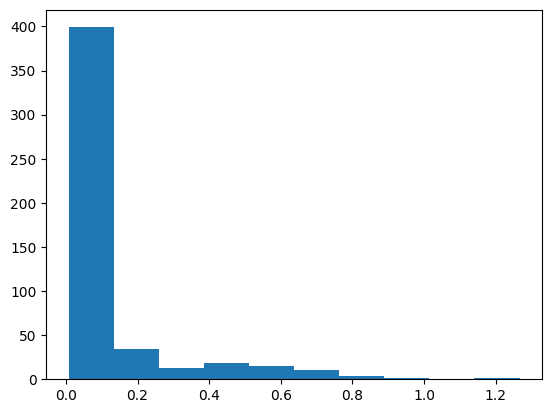

In [13]:
# Histogram of call length across types
plt.hist(annotations_hdor_df['Delta Time (s)'])
plt.show()

In [14]:
# Average length split by call type
annotations_hdor_df.groupby('call_type')['Delta Time (s)'].mean()

call_type
hdor         0.145122
hdor_arch    0.024350
hdor_asc     0.532152
hdor_wig     0.303220
Name: Delta Time (s), dtype: float64

In [17]:
# Average length across all call types
annotations_hdor_df['Delta Time (s)'].mean()

0.10288850806451612

In [18]:
# Max length split by call type
annotations_hdor_df.groupby('call_type')['Delta Time (s)'].max()

call_type
hdor         0.6823
hdor_arch    0.2911
hdor_asc     1.2664
hdor_wig     0.3687
Name: Delta Time (s), dtype: float64

In [19]:
# Max length across all call types
annotations_hdor_df['Delta Time (s)'].max()

1.2664

In [20]:
# Minimum length split by call type
annotations_hdor_df.groupby('call_type')['Delta Time (s)'].min()

call_type
hdor         0.0108
hdor_arch    0.0077
hdor_asc     0.1625
hdor_wig     0.2241
Name: Delta Time (s), dtype: float64

In [21]:
# Minimum length across all call types
annotations_hdor_df['Delta Time (s)'].min()

0.0077

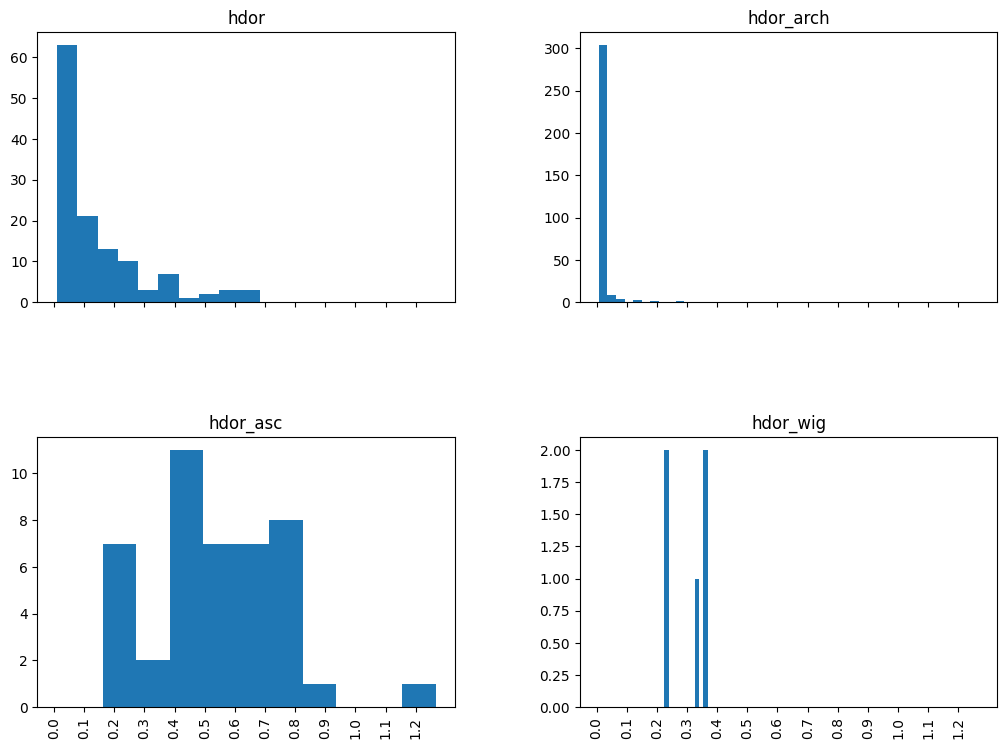

In [22]:
# Histogram of call length split by type
annotations_hdor_df.hist('Delta Time (s)', by = 'call_type', sharex = True, figsize=(12,9))
plt.xticks(np.arange(0, 1.25, 0.1))
plt.show()

In [24]:
# Maximum frequency of dormouse calls split by call type
annotations_hdor_df.groupby('call_type')['high_f'].max()

call_type
hdor         67672.089
hdor_arch    52560.865
hdor_asc     46780.278
hdor_wig     51780.609
Name: high_f, dtype: float64

In [25]:
# Maximum frequency of dormouse calls across all call types
annotations_hdor_df['high_f'].max()

67672.089

In [26]:
# Minimum frequency of dormouse calls split by call type
annotations_hdor_df.groupby('call_type')['high_f'].min()

call_type
hdor          9457.280
hdor_arch    10192.846
hdor_asc     20555.893
hdor_wig     47161.639
Name: high_f, dtype: float64

In [27]:
# Minimum frequency of dormouse calls across all call types
annotations_hdor_df['high_f'].min()

9457.28

In [25]:
annotations_hdor_df['Delta Freq (Hz)'].min()

2861.212